In [1]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# $\mathbb{B}_5$

In [2]:
n_band = 5
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True),
    BraidOperator(3), BraidOperator(3, True),
    BraidOperator(4), BraidOperator(4, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_all_combination_generate_sample(n_length=3)
print("The number of braids: ", len(braid_operator_list_gen))
# for operator_list in braid_operator_list_gen[:10]:
#     show_braid_words(operator_list)

The number of braids:  512


In [3]:
n_core = 16 # the numebr of cores used in computation
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

Centers:  [1, 9, 14, 15, 12, 10, 11, 13, 191, 198, 199, 87, 86, 206, 207, 118, 79, 78, 77, 76, 151, 223, 94, 95, 109, 102, 143, 142, 135, 134, 127, 125, 100, 124, 116, 111, 110, 63, 182, 103, 117, 61, 222, 54, 4, 5, 6, 7, 255, 246, 22, 23, 60, 30, 31, 36, 150, 45, 46, 47, 53, 39, 52, 38, 162, 170, 253, 171, 351, 350, 278, 342, 279, 180, 163, 252, 205, 245, 317, 316, 197, 196, 234, 235, 204, 189, 343, 308, 244, 227, 181, 226, 188, 309, 286, 80, 35, 34, 372, 81, 25, 24, 88, 89, 17, 16, 43, 98, 99, 106, 42, 287, 381, 132, 133, 380, 373, 107, 140, 141, 290, 438, 482, 310, 483, 508, 484, 490, 493, 292, 491, 294, 291, 295, 367, 437, 366, 374, 365, 363, 362, 347, 383, 345, 418, 419, 344, 420, 426, 427, 429, 338, 337, 336, 436, 319, 0, 167, 281, 145, 144, 137, 128, 93, 92, 91, 85, 84, 82, 75, 74, 73, 29, 28, 27, 21, 20, 18, 3, 2, 146, 148, 149, 164, 280, 274, 273, 272, 239, 238, 237, 231, 230, 228, 283, 221, 219, 217, 216, 201, 192, 175, 174, 173, 509, 166, 220, 511]
The number of samples:  [1

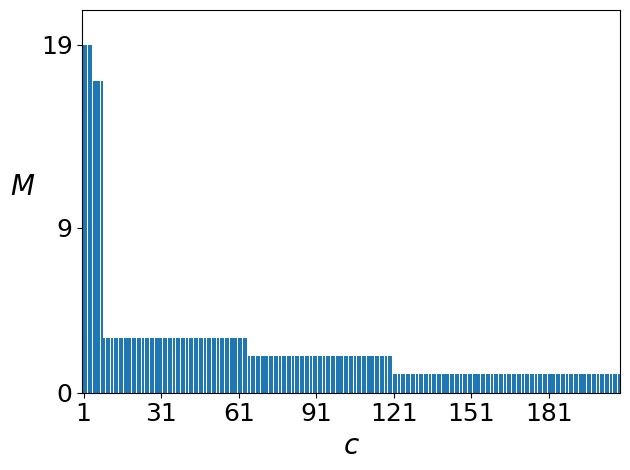

In [6]:
fig = plt.figure()

xticks = list(range(1,len(center_indices)+1, 30))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('B5.svg')

# Save data

In [7]:
directory_name = 'B5'
with open('./fig2/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))

In [8]:
for i, group in enumerate(groups):
    with open('./fig2/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# Extra

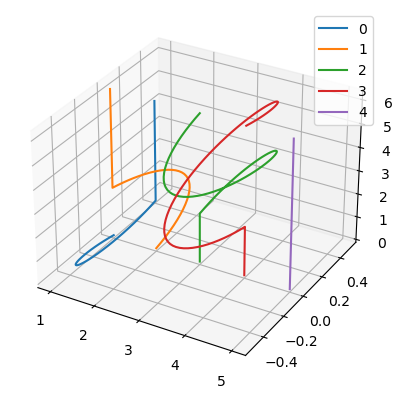

In [10]:
import matplotlib.pyplot as plt


ks = np.linspace(0, 2 * np.pi, 100)

Es = np.array([models[100].get_energies(k) for k in ks])
ax = plt.figure().add_subplot(projection='3d')
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    ax.plot(x, y, ks, label='{0}'.format(index))
    ax.legend()


plt.show()